In [26]:
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

df = pd.read_csv("mydata.csv")

In [27]:
df.head()

sentiment                                               Text
0          1  Yes! Excellent post! So many people doesn’t un...
1          1                              Love it. Thank you. 👍
2          1                 Great to see these types of posts!
3         -1  AI is very powerful, but we all must remember:...
4          0  Out of curiosity,  what is your usage of diffe...

In [28]:
df.columns

Index(['sentiment', 'Text'], dtype='object')

In [29]:
tweet_df = df[['sentiment','Text']]
print(tweet_df.shape)
tweet_df.head(5)

(387, 2)


sentiment                                               Text
0          1  Yes! Excellent post! So many people doesn’t un...
1          1                              Love it. Thank you. 👍
2          1                 Great to see these types of posts!
3         -1  AI is very powerful, but we all must remember:...
4          0  Out of curiosity,  what is your usage of diffe...

In [11]:
#tweet_df = tweet_df[tweet_df['sentiment'] != 'neutral']
#print(tweet_df.shape)
#tweet_df.head(5)

In [31]:
tweet_df["sentiment"].value_counts()

 1    197
-1     98
 0     92
Name: sentiment, dtype: int64

In [32]:
sentiment_label = tweet_df.sentiment.factorize()
sentiment_label

(array([0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0,
        2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 1, 0, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 2, 2, 1, 2, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0,
        2, 1, 2, 0, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
        2, 1, 0, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 2, 0,
        1, 2, 0, 2, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 0, 0, 1, 0, 1, 1, 1, 2,
        1, 2, 2, 0, 0, 0, 2, 1, 0, 2, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 1,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 1,
        0, 2, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0,
        1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 1, 1, 2, 0, 2, 2, 0, 0, 0, 1, 2, 2,
        1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 

In [40]:
tweet = tweet_df.Text.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [41]:
print(tokenizer.word_index)

{'to': 1, 'the': 2, 'and': 3, 'a': 4, 'it': 5, 'i': 6, 'of': 7, 'you': 8, 'for': 9, 'in': 10, 'that': 11, 'is': 12, 'with': 13, 'this': 14, 'chatgpt': 15, 'have': 16, 'be': 17, 'on': 18, 'how': 19, 'as': 20, 'my': 21, 'use': 22, 'can': 23, 'but': 24, 'will': 25, 'do': 26, 'we': 27, 'they': 28, 'just': 29, 'ai': 30, 'what': 31, 'are': 32, 'me': 33, 'not': 34, 'so': 35, 'if': 36, 'your': 37, 'or': 38, 'students': 39, 'them': 40, 'like': 41, "it's": 42, 'using': 43, 'was': 44, 'teacher': 45, 'all': 46, 'an': 47, 'about': 48, 'at': 49, 'get': 50, 'by': 51, 'their': 52, 'math': 53, 'more': 54, 'now': 55, 'when': 56, 'work': 57, 'code': 58, 'out': 59, 'would': 60, 'tool': 61, 'know': 62, 'think': 63, 'had': 64, 'up': 65, 'people': 66, 'need': 67, 'from': 68, 'gpt': 69, 'time': 70, 'then': 71, 'teaching': 72, 'ask': 73, 'some': 74, 'learn': 75, 'good': 76, 'learning': 77, "don't": 78, 'school': 79, 'been': 80, 'teachers': 81, 'help': 82, 'very': 83, 'it’s': 84, "i'm": 85, 'kids': 86, 'no': 87

In [42]:
print(tweet[0])
print(encoded_docs[0])

Yes! Excellent post! So many people doesn’t understand that ChatGPT isn’t a magical box that gives answers when prompt but a very powerful tool you need to learn how to use. Thanks for sharing the knowledge 🤜🏻🤛🏻
[315, 908, 555, 35, 168, 66, 556, 108, 11, 15, 458, 4, 1374, 557, 11, 459, 139, 56, 281, 24, 4, 83, 387, 61, 8, 67, 1, 75, 19, 1, 22, 340, 9, 252, 2, 233, 1375]


In [43]:
print(padded_sequence[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0  315  908  555   35  168
   66  556  108   11   15  458    4 1374  557   11  459  139   56  281
   24    4   83  387   61    8   67    1   75   19    1   22  340    9
  252 

In [44]:
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy', 'Precision', 'Recall'])  
print(model.summary()) 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 32)           94656     
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 200, 32)          0         
 lDropout1D)                                                     
                                                                 
 lstm_2 (LSTM)               (None, 50)                16600     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 111,307
Trainable params: 111,307
Non-trainable params: 0
________________________________________________

In [45]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
10/10 [==============================] - 6s 308ms/step - loss: 0.6838 - accuracy: 0.2589 - precision: 0.4868 - recall: 0.8217 - val_loss: 0.6757 - val_accuracy: 0.1795 - val_precision: 0.4231 - val_recall: 1.0000
Epoch 2/5
10/10 [==============================] - 3s 311ms/step - loss: 0.6337 - accuracy: 0.2718 - precision: 0.5081 - recall: 1.0000 - val_loss: 0.6151 - val_accuracy: 0.1795 - val_precision: 0.4231 - val_recall: 1.0000
Epoch 3/5
10/10 [==============================] - 5s 396ms/step - loss: 0.4926 - accuracy: 0.2718 - precision: 0.5081 - recall: 1.0000 - val_loss: 0.5832 - val_accuracy: 0.1795 - val_precision: 0.4231 - val_recall: 1.0000
Epoch 4/5
10/10 [==============================] - 3s 269ms/step - loss: 0.3981 - accuracy: 0.2718 - precision: 0.5081 - recall: 1.0000 - val_loss: 0.5430 - val_accuracy: 0.1795 - val_precision: 0.4231 - val_recall: 1.0000
Epoch 5/5
10/10 [==============================] - 3s 271ms/step - loss: 0.2952 - accuracy: 0.3042 - precisi

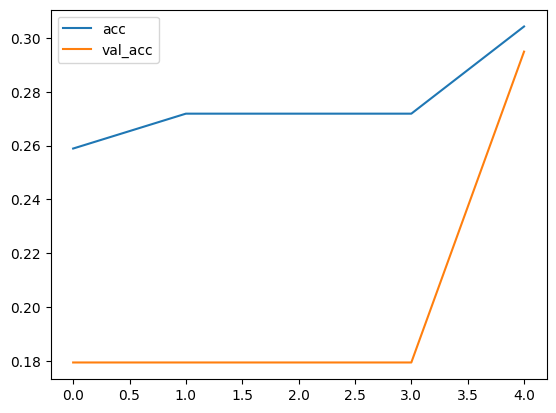

<Figure size 640x480 with 0 Axes>

In [46]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

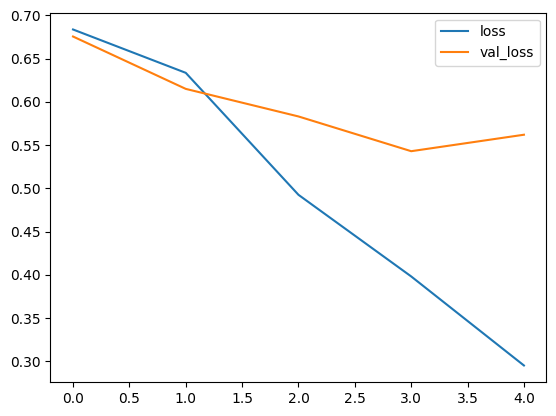

<Figure size 640x480 with 0 Axes>

In [47]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plot.jpg")

In [57]:
def predict_sentiment(array):
    tw = tokenizer.texts_to_sequences([array])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])
    pred = sentiment_label[1][prediction]
    return pred

Thank you for sharing your experience
1/1 [==============================] - 0s 48ms/step
Predicted label:  -1
I’m a writer and I used GPT-4 to summarize a really long academic article today. I did each section separately and went back and read through each section to test it, and it really grabbed the main points well without using too much or the original language. I was impressed.
1/1 [==============================] - 0s 41ms/step
Predicted label:  -1
You’re doing exactly what I have suggested. This is like calculators used to be treated. They need to understand how to use these tools because they are part of how you code now. I wouldn’t hire an engineer that wasn’t onboard with using CoPilot and similar. It’s part of our workflow. I equally want them to understand the Engineering so they don’t blow all the productivity gains with drawn out debugging sessions. 

You’ll also find it does a great job with providing just “scaffolding” for a much larger and more complex application. Ch

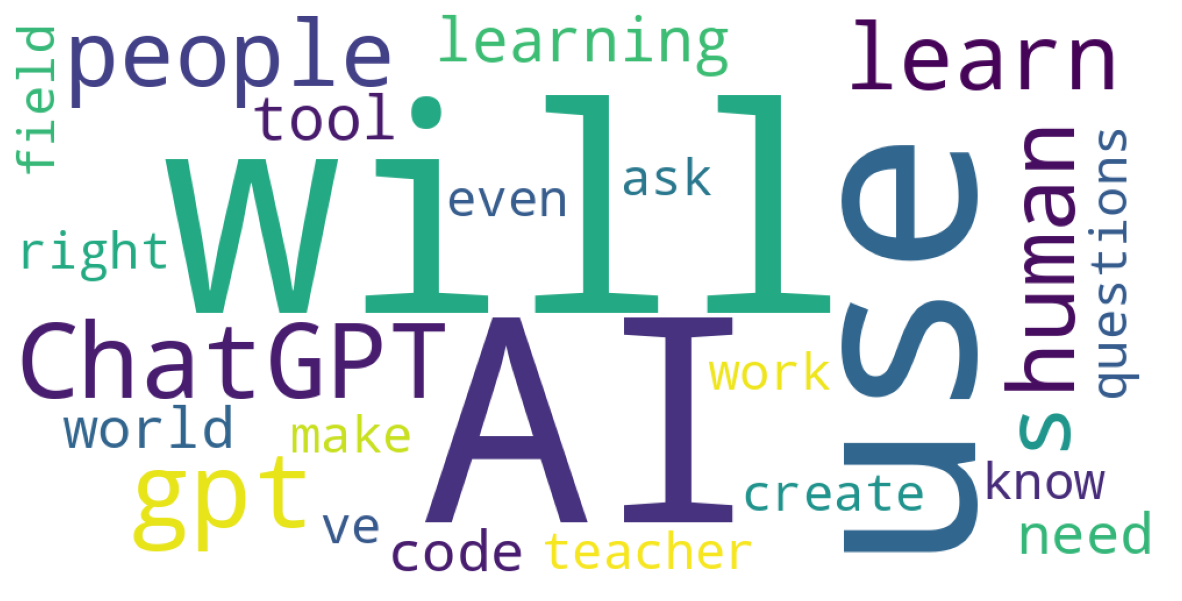

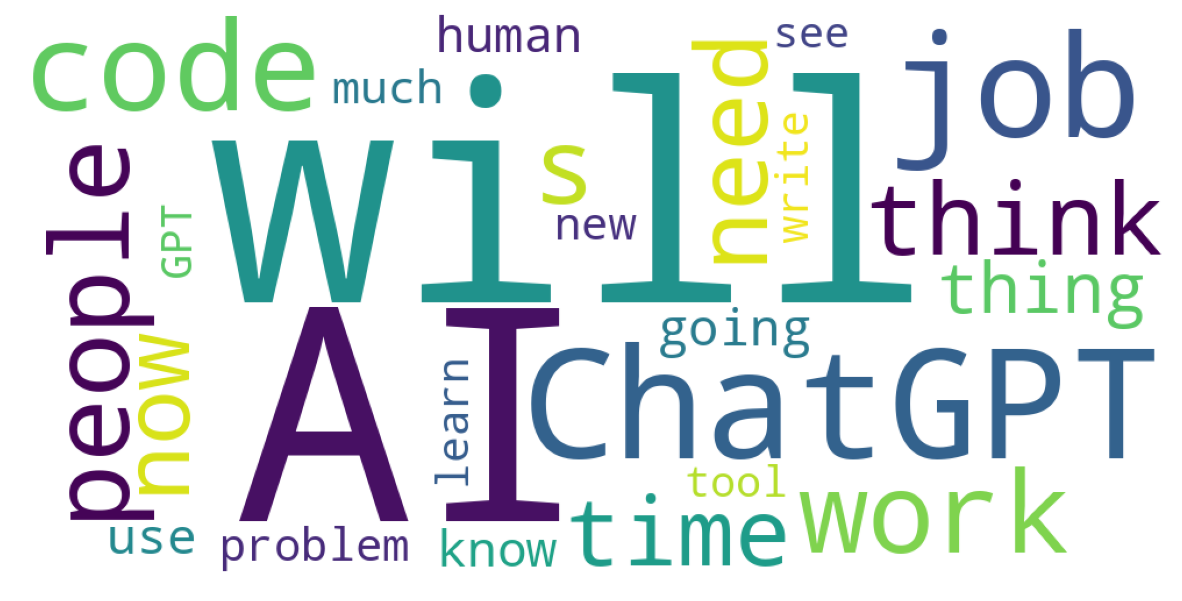

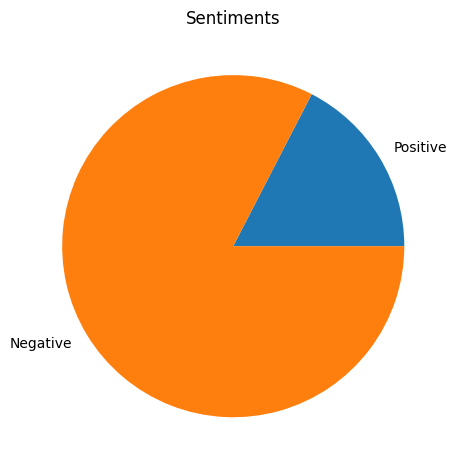

In [62]:
from os import pwrite
#test_sentence1 = "I enjoyed my journey on this flight."
#predict_sentiment(test_sentence1)

#test_sentence2 = "This is the worst thing!"
#predict_sentiment(test_sentence2)

dft = pd.read_csv("testingsample.csv")
text2 = dft["Text"]
pos = 0
neg = 0
neu = 0


import csv 
pw = []
nw = []
nuw = []
for row in text2:
  print(row)
  predval = predict_sentiment(row)
  if predval == 1:
    pos = pos + 1 
    pw.append(row)  
  elif predval == -1: 
    neg = neg + 1
    nw.append(row)
  elif predval == 0:
    neu = neu + 1
    nuw.append(row)

print(pos)
print(neg)
print(neu)

!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

stopwords = STOPWORDS.copy()

#convert list to string and generate
unique_string=(" ").join(pw)
wordcloud = WordCloud(background_color='white', max_words = 25, stopwords=stopwords, margin=10, width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

unique_=(" ").join(nw)
wordcloud = WordCloud(background_color='white', max_words = 25, stopwords=stopwords, margin=10, width = 1000, height = 500).generate(unique_)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_namei"+".png", bbox_inches='tight')
plt.show()
plt.close()

"""unique=(" ").join(nuw)
wordcloud = WordCloud(background_color='white', max_words = 25, stopwords=stopwords, margin=10, width = 1000, height = 500).generate(unique)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_namei"+".png", bbox_inches='tight')
plt.show()
plt.close()"""

import numpy as np
#y = np.array([pos, neg])
#mylabels = ["Positive, Negative"]
#plt.pie(y, labels = mylabels)
#plt.show() 

x = [pos, neg]
mylabels = ['Positive', 'Negative']

fig, ax = plt.subplots()
ax.pie(x, labels=mylabels)
ax.set_title('Sentiments')
plt.tight_layout()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')